# Problem statement
The dataset contains a set of 150 records under 5 attributes - Petal Length, Petal Width, Sepal Length, Sepal width and Class(Species).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import scipy
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
# t-test
from scipy.stats import ttest_ind
# Anova test
import statsmodels.api as sm
from statsmodels.formula.api import ols
# Tukey HSD
from statsmodels.stats.multicomp import pairwise_tukeyhsd
# chi-square
from scipy.stats import (chi2,chi2_contingency)
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

In [2]:
df=pd.read_csv('IRIS.csv')

In [3]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
value_counts=df['species'].value_counts()
print(value_counts)

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64


In [5]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


<AxesSubplot:>

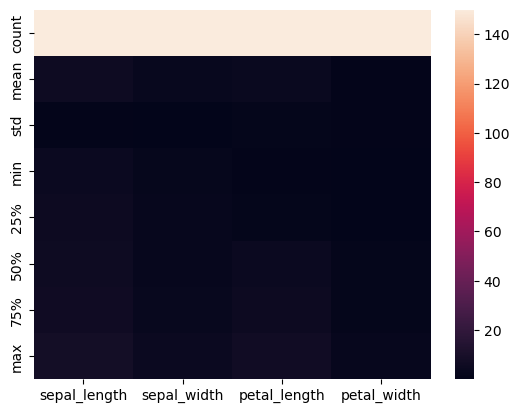

In [6]:
sns.heatmap(df.describe())

In [7]:
df.shape

(150, 5)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [9]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [10]:
df.duplicated().sum()

3

#data cleaning
there are 3 duplicate rws so we will drop the data

In [15]:
df.drop_duplicates(inplace=True)

In [16]:
df.shape

(147, 5)

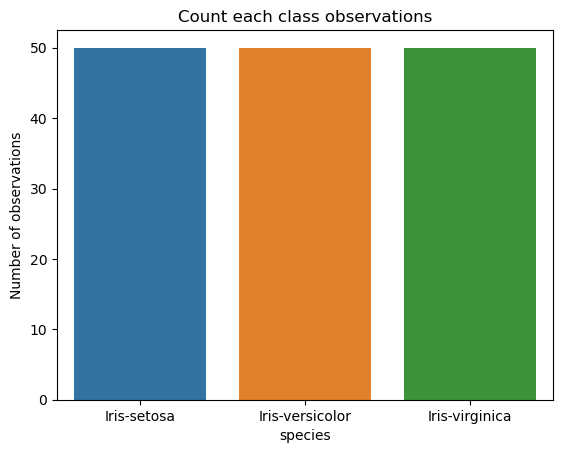

In [13]:
#checking if the data is balanced
sns.countplot(x=df['species'])
plt.xlabel('species')
plt.ylabel('Number of observations')
plt.title('Count each class observations')
plt.show()

In [ ]:
# Distribution of features

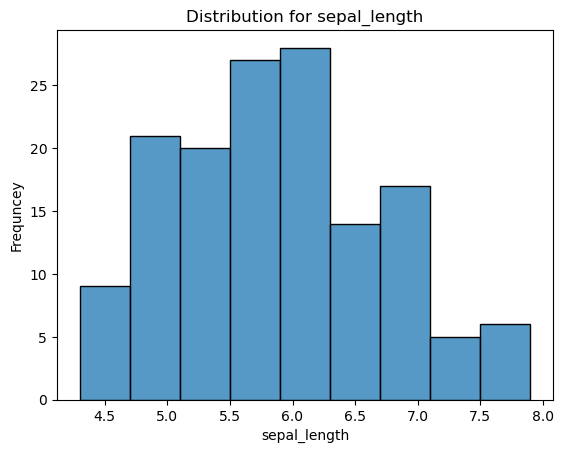

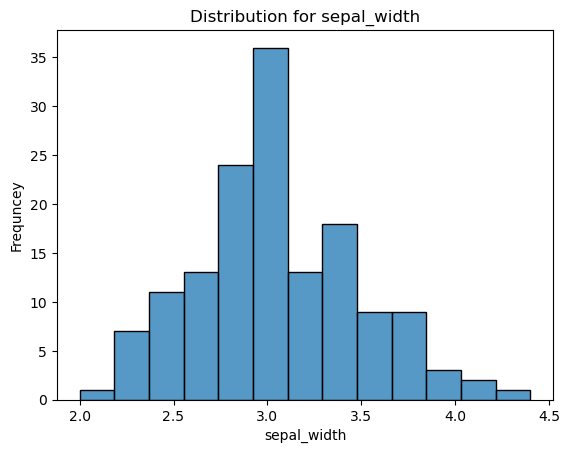

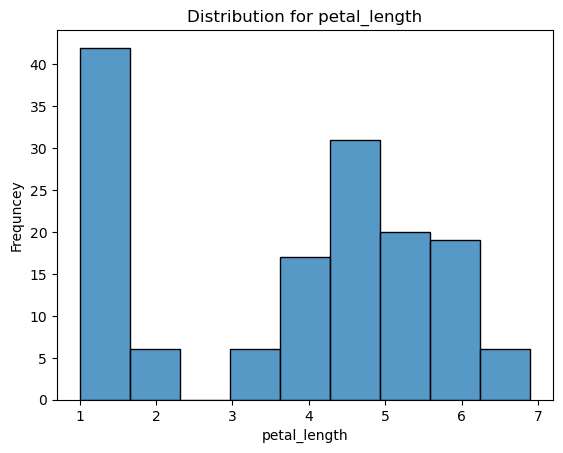

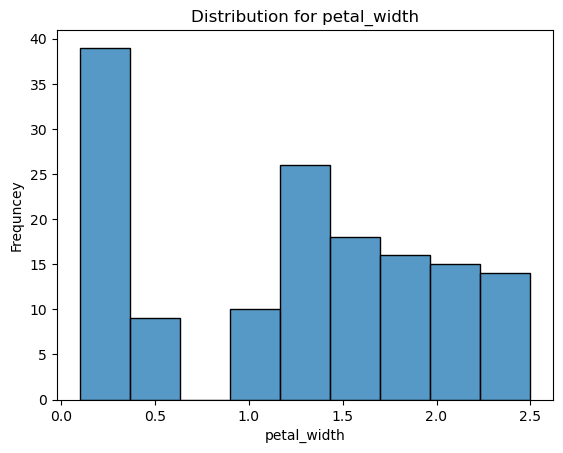

In [17]:
for feature in df.drop(columns='species'):
    sns.histplot(data=df, x=feature)
    plt.xlabel(f'{feature}')
    plt.ylabel('Frequncey')
    plt.title(f'Distribution for {feature}')
    plt.show()

In [ ]:
We can say that both petal_length and petal_width are divided into 2 groups i.e. they may be two classes has the near by values
sepal width is about to be normally distributed
sepal length is skwed

# Outliers analysis

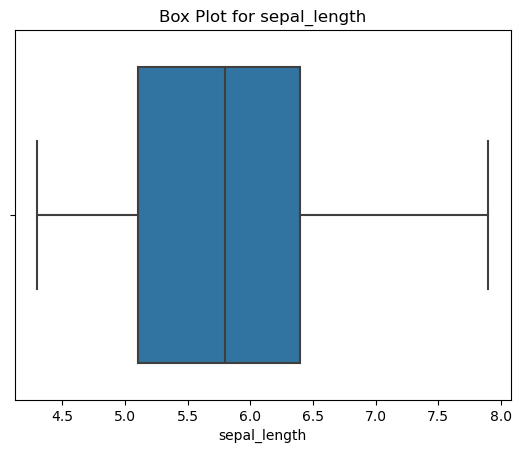

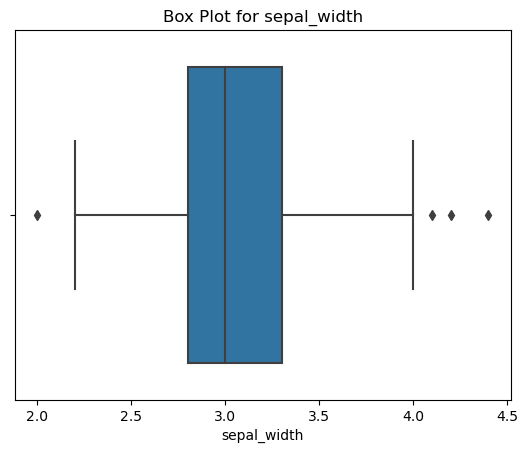

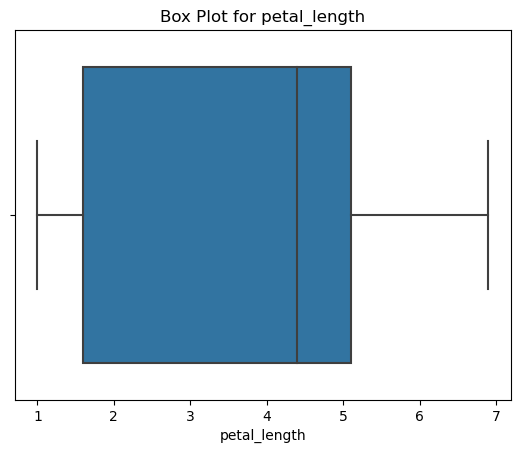

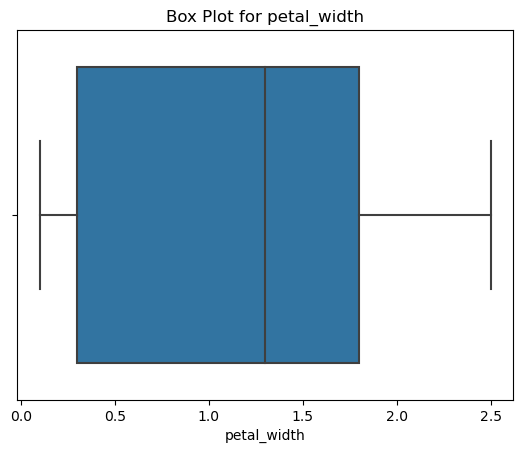

In [18]:
for feature in df.drop(columns='species'):
    sns.boxplot(x=df[feature])
    plt.title(f'Box Plot for {feature}')
    plt.show()

# We can say that there is outliers in sepal_width so we will remove them

<AxesSubplot:xlabel='sepal_width'>

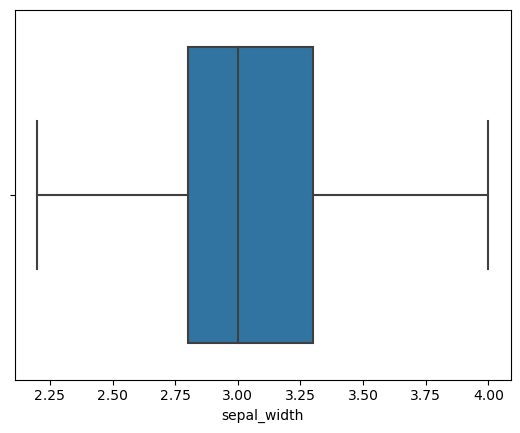

In [19]:
# removing outliers
lower , upper = df['sepal_width'].quantile([0.02,0.98]).to_list()
df = df[df['sepal_width'].between(lower,upper)]
sns.boxplot(x=df['sepal_width'])

In [20]:
df.isnull()

,sepal_length,sepal_width,petal_length,petal_width,species
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
145,False,False,False,False,False
146,False,False,False,False,False
147,False,False,False,False,False
148,False,False,False,False,False


<AxesSubplot:>

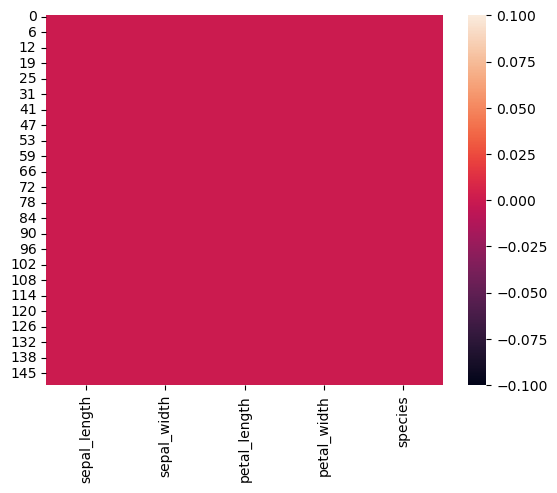

In [21]:
sns.heatmap(df.isnull())

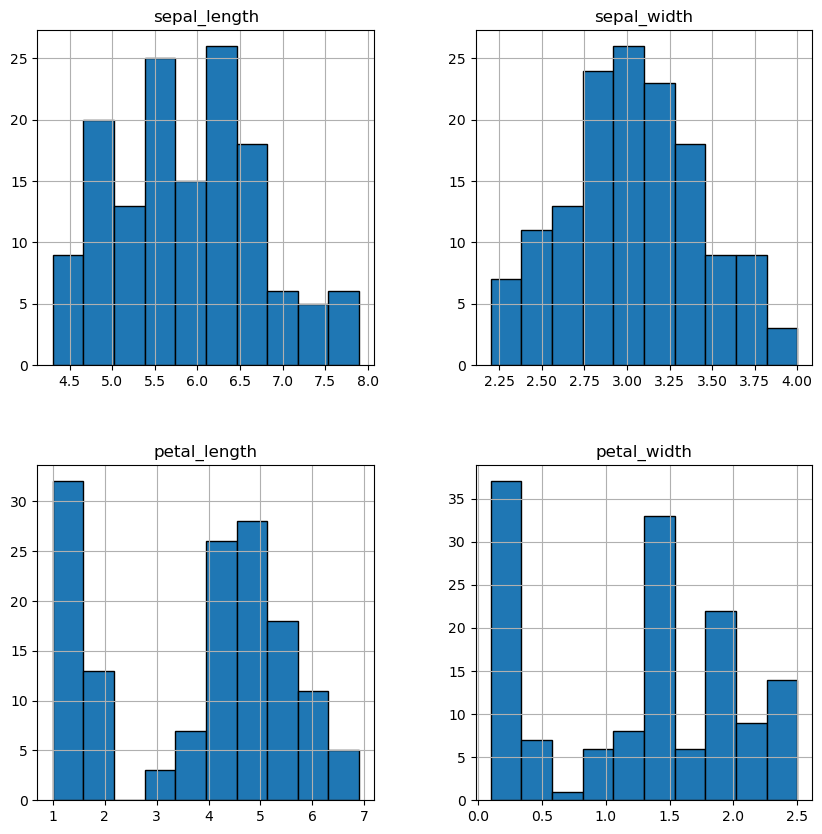

In [41]:
df.hist(edgecolor="black", figsize = (10, 10))
plt.show()

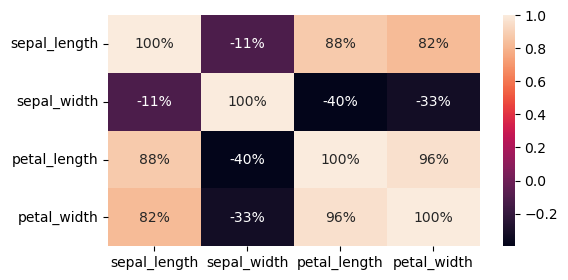

In [27]:
plt.figure(figsize=(6,3))
sns.heatmap(df.corr(),annot=True,fmt=".0%")
plt.show()

In [28]:
#By seeing the above heatmap we can decide that we can use one sepal feature and one petal feature 
#Splitting the data into training and testing
X=df.iloc[:,1:3]
X.head()

,sepal_width,petal_length
0,3.5,1.4
1,3.0,1.4
2,3.2,1.3
3,3.1,1.5
4,3.6,1.4


In [29]:
Y=df["species"]

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [31]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.50,random_state=0)
X_train.shape

(71, 2)

In [32]:
Y_train.shape

(71,)

In [39]:
logreg = LogisticRegression()
logreg.fit(X, Y)
Y_pred = logreg.predict(X)
print(round(metrics.accuracy_score(Y, Y_pred),2))

0.95


In [33]:
a=LogisticRegression()
a.fit(X_train,Y_train)

LogisticRegression()

In [34]:
b=a.predict(X_test)
print(b)

['Iris-versicolor' 'Iris-virginica' 'Iris-setosa' 'Iris-versicolor'
 'Iris-setosa' 'Iris-setosa' 'Iris-virginica' 'Iris-virginica'
 'Iris-virginica' 'Iris-virginica' 'Iris-virginica' 'Iris-virginica'
 'Iris-setosa' 'Iris-virginica' 'Iris-virginica' 'Iris-setosa'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica' 'Iris-setosa'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa'
 'Iris-versicolor' 'Iris-setosa' 'Iris-virginica' 'Iris-virginica'
 'Iris-setosa' 'Iris-virginica' 'Iris-setosa' 'Iris-setosa'
 'Iris-virginica' 'Iris-setosa' 'Iris-setosa' 'Iris-virginica'
 'Iris-versicolor' 'Iris-virginica' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-virginica' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-setosa' 'Iris-versicolor' 'Iris-virginica' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica' 'Iris-virginica'
 'Iris-versicolor' 'Iris-virginica' 'Iris-virginica' 'Iris-setosa'
 'Iris-versicolor' 'Iris-virginica' 'Iris-virginica' 'Iris-v

ValueError: x and y must be the same size

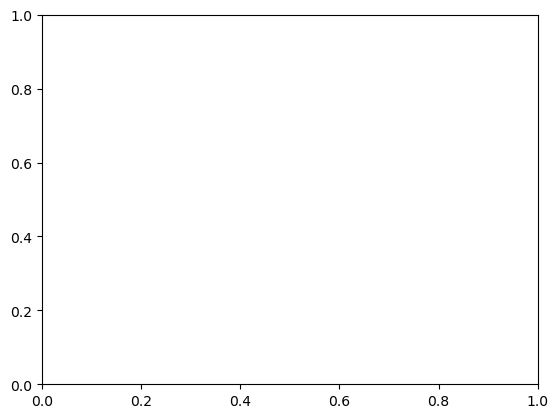

In [35]:
plt.scatter(X_train,X_test,color="green")
plt.scatter(b,Y_test,color="blue")
plt.show()

In [23]:
# defining the input and output variables
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [26]:
# splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=30)

NameError: name 'train_test_split' is not defined

In [25]:
# splitting the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.2, random_state=52)
# training the model

NameError: name 'train_test_split' is not defined